In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from src.visualization.plots import plot_score_differences
from src.data.tidy_data import prepare_data, create_pivot_table
from src.results.statistical_analysis import calculate_grouped_statistics, evaluate_differences, generate_difference_report, perform_post_hoc_analysis, identify_significant_differences
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_score_differences = pd.read_parquet('data/results/score_differences_data.parquet')
df_performance_results = pd.read_parquet('data/results/performance_detailed_data.parquet')
df_description = pd.read_parquet('data/results/df_description_data.parquet')
df_complexity = pd.read_parquet('data/results/complexity_data.parquet')

In [4]:
df_merged = prepare_data(df_description, df_score_differences, df_performance_results, 1)

In [5]:
balanced_complexity = df_complexity[abs(df_complexity['majority_class_complexity']-df_complexity['minority_class_complexity'])<10**-1]['dataset'].unique()
df_merged['balanced_complexity'] = df_merged['dataset'].isin(balanced_complexity)


In [6]:
df_merged

,dataset,metric_x,score,score_sd,k,metric_y,minority_class_complexity,most_complex_class,diff_score_minority_class_complexity,diff_score_most_complex_class,class_prop_category,minority_class_complexity_category,most_complex_class_category,balanced_complexity
0,a9a,accuracy_score,0.850035,0.003225,1,kdn,0.375717,0.375717,0.225753,0.225753,0.2-0.3,0.3-0.4,0.3-0.4,False
1,a9a,accuracy_score,0.850035,0.003225,1,ddn,0.423633,0.423633,0.273669,0.273669,0.2-0.3,0.4-0.5,0.4-0.5,False
2,appendicitis,accuracy_score,0.887013,0.056549,1,kdn,0.380952,0.380952,0.267965,0.267965,0.1-0.2,0.3-0.4,0.3-0.4,False
3,appendicitis,accuracy_score,0.887013,0.056549,1,ddn,0.380952,0.380952,0.267965,0.267965,0.1-0.2,0.3-0.4,0.3-0.4,False
4,australian,accuracy_score,0.875362,0.037345,1,kdn,0.234528,0.234528,0.109890,0.109890,0.4-0.5,0.2-0.3,0.2-0.3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,glass1,scaled_mcc_score,0.809645,0.069831,1,ddn,0.289474,0.289474,0.099119,0.099119,0.3-0.4,0.2-0.3,0.2-0.3,False
516,newthyroid2,scaled_mcc_score,0.984466,0.019025,1,kdn,0.028571,0.028571,0.013038,0.013038,0.1-0.2,0-0.1,0-0.1,True
517,newthyroid2,scaled_mcc_score,0.984466,0.019025,1,ddn,0.028571,0.028571,0.013038,0.013038,0.1-0.2,0-0.1,0-0.1,True
518,vehicle2,scaled_mcc_score,0.987671,0.007849,1,kdn,0.036697,0.036697,0.024368,0.024368,0.2-0.3,0-0.1,0-0.1,True


In [7]:
df_merged_balanced = df_merged[df_merged['balanced_complexity']]
df_merged_imbalanced = df_merged[~df_merged['balanced_complexity']]

## Complexity category balanced

In [8]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged_balanced[df_merged_balanced['metric_x'] == performance_metric], diff='diff_score_most_complex_class', x_var='most_complex_class_category'))

accuracy_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.019269,0.020552,0.020905,0.000000,0.059916,11
1,0-0.1,kdn,0.019269,0.020623,0.020982,0.000000,0.060244,11
2,0.1-0.2,ddn,0.071602,0.042319,0.082301,-0.103577,0.091333,5
3,0.1-0.2,kdn,0.071602,0.042227,0.082270,-0.103577,0.091333,5
4,0.2-0.3,ddn,0.101353,0.104974,0.015538,0.091618,0.125571,4
5,0.2-0.3,kdn,0.102167,0.092223,0.037697,0.038988,0.125571,4
6,0.3-0.4,ddn,0.144389,0.144389,0.106172,0.069314,0.219464,2
7,0.3-0.4,kdn,0.144389,0.144389,0.106172,0.069314,0.219464,2
8,0.4-0.5,ddn,0.146557,0.146557,NaN,0.146557,0.146557,1
9,0.4-0.5,kdn,0.146557,0.146557,NaN,0.146557,0.146557,1


f1_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.001905,0.003894,0.039687,-0.099023,0.058444,11
1,0-0.1,kdn,0.001905,0.003965,0.039743,-0.099023,0.058771,11
2,0.1-0.2,ddn,0.038705,0.016779,0.082988,-0.126820,0.075449,5
3,0.1-0.2,kdn,0.038247,0.016688,0.082958,-0.126820,0.075449,5
4,0.2-0.3,ddn,0.094876,0.093116,0.018375,0.068991,0.113723,4
5,0.2-0.3,kdn,0.082647,0.080366,0.031272,0.042448,0.113723,4
6,0.3-0.4,ddn,0.104152,0.104152,0.106265,0.029012,0.179293,2
7,0.3-0.4,kdn,0.104152,0.104152,0.106265,0.029012,0.179293,2
8,0.4-0.5,ddn,0.190319,0.190319,NaN,0.190319,0.190319,1
9,0.4-0.5,kdn,0.190319,0.190319,NaN,0.190319,0.190319,1


gps_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.011081,0.012331,0.029729,-0.052085,0.059821,11
1,0-0.1,kdn,0.011081,0.012403,0.029799,-0.052085,0.060148,11
2,0.1-0.2,ddn,0.067687,0.034399,0.081807,-0.110851,0.085696,5
3,0.1-0.2,kdn,0.067687,0.034308,0.081774,-0.110851,0.085696,5
4,0.2-0.3,ddn,0.098869,0.103097,0.015880,0.090534,0.124114,4
5,0.2-0.3,kdn,0.099409,0.090346,0.037216,0.038453,0.124114,4
6,0.3-0.4,ddn,0.132846,0.132846,0.106329,0.057659,0.208032,2
7,0.3-0.4,kdn,0.132846,0.132846,0.106329,0.057659,0.208032,2
8,0.4-0.5,ddn,0.130090,0.130090,NaN,0.130090,0.130090,1
9,0.4-0.5,kdn,0.130090,0.130090,NaN,0.130090,0.130090,1


scaled_mcc_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.012127,0.014846,0.025159,-0.027966,0.060149,11
1,0-0.1,kdn,0.012127,0.014918,0.025236,-0.027966,0.060476,11
2,0.1-0.2,ddn,0.072856,0.039510,0.077436,-0.098006,0.085972,5
3,0.1-0.2,kdn,0.072856,0.039419,0.077406,-0.098006,0.085972,5
4,0.2-0.3,ddn,0.100998,0.105700,0.016319,0.092869,0.127935,4
5,0.2-0.3,kdn,0.101206,0.092950,0.037199,0.041452,0.127935,4
6,0.3-0.4,ddn,0.143648,0.143648,0.097822,0.074477,0.212818,2
7,0.3-0.4,kdn,0.143648,0.143648,0.097822,0.074477,0.212818,2
8,0.4-0.5,ddn,0.154301,0.154301,NaN,0.154301,0.154301,1
9,0.4-0.5,kdn,0.154301,0.154301,NaN,0.154301,0.154301,1


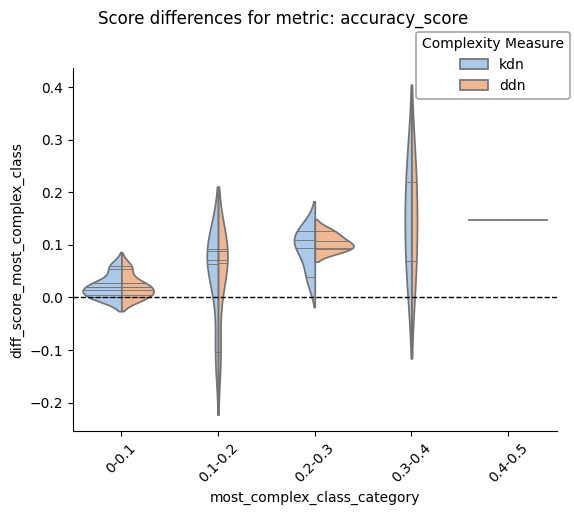

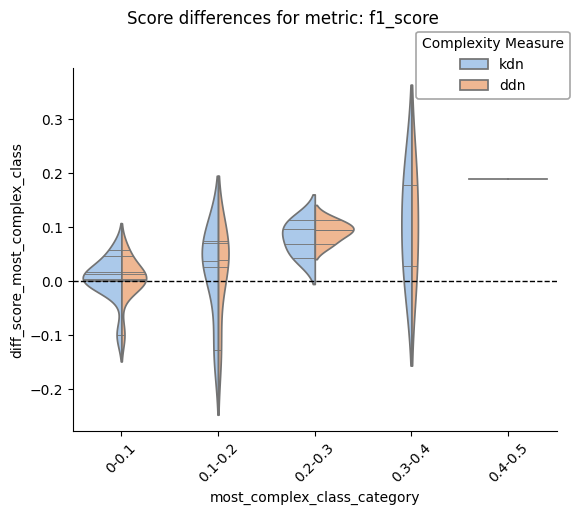

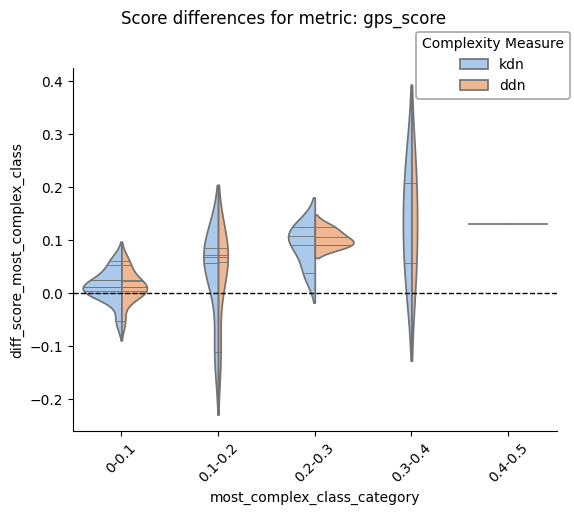

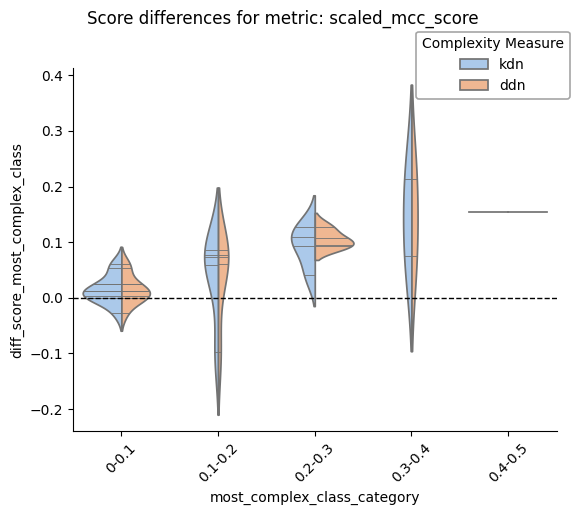

In [9]:
plot_score_differences(df_merged_balanced, diff='diff_score_most_complex_class', x_var='most_complex_class_category')

In [10]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged_balanced[df_merged_balanced['metric_x'] == performance_metric], diff='diff_score_most_complex_class', x_var='minority_class_complexity_category'))

accuracy_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.019269,0.020552,0.020905,0.000000,0.059916,11
1,0-0.1,kdn,0.019269,0.020623,0.020982,0.000000,0.060244,11
2,0.1-0.2,ddn,0.071602,0.042319,0.082301,-0.103577,0.091333,5
3,0.1-0.2,kdn,0.071602,0.042227,0.082270,-0.103577,0.091333,5
4,0.2-0.3,ddn,0.101353,0.104974,0.015538,0.091618,0.125571,4
5,0.2-0.3,kdn,0.102167,0.092223,0.037697,0.038988,0.125571,4
6,0.3-0.4,ddn,0.144389,0.144389,0.106172,0.069314,0.219464,2
7,0.3-0.4,kdn,0.144389,0.144389,0.106172,0.069314,0.219464,2
8,0.4-0.5,ddn,0.146557,0.146557,NaN,0.146557,0.146557,1
9,0.4-0.5,kdn,0.146557,0.146557,NaN,0.146557,0.146557,1


f1_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.001905,0.003894,0.039687,-0.099023,0.058444,11
1,0-0.1,kdn,0.001905,0.003965,0.039743,-0.099023,0.058771,11
2,0.1-0.2,ddn,0.038705,0.016779,0.082988,-0.126820,0.075449,5
3,0.1-0.2,kdn,0.038247,0.016688,0.082958,-0.126820,0.075449,5
4,0.2-0.3,ddn,0.094876,0.093116,0.018375,0.068991,0.113723,4
5,0.2-0.3,kdn,0.082647,0.080366,0.031272,0.042448,0.113723,4
6,0.3-0.4,ddn,0.104152,0.104152,0.106265,0.029012,0.179293,2
7,0.3-0.4,kdn,0.104152,0.104152,0.106265,0.029012,0.179293,2
8,0.4-0.5,ddn,0.190319,0.190319,NaN,0.190319,0.190319,1
9,0.4-0.5,kdn,0.190319,0.190319,NaN,0.190319,0.190319,1


gps_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.011081,0.012331,0.029729,-0.052085,0.059821,11
1,0-0.1,kdn,0.011081,0.012403,0.029799,-0.052085,0.060148,11
2,0.1-0.2,ddn,0.067687,0.034399,0.081807,-0.110851,0.085696,5
3,0.1-0.2,kdn,0.067687,0.034308,0.081774,-0.110851,0.085696,5
4,0.2-0.3,ddn,0.098869,0.103097,0.015880,0.090534,0.124114,4
5,0.2-0.3,kdn,0.099409,0.090346,0.037216,0.038453,0.124114,4
6,0.3-0.4,ddn,0.132846,0.132846,0.106329,0.057659,0.208032,2
7,0.3-0.4,kdn,0.132846,0.132846,0.106329,0.057659,0.208032,2
8,0.4-0.5,ddn,0.130090,0.130090,NaN,0.130090,0.130090,1
9,0.4-0.5,kdn,0.130090,0.130090,NaN,0.130090,0.130090,1


scaled_mcc_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.012127,0.014846,0.025159,-0.027966,0.060149,11
1,0-0.1,kdn,0.012127,0.014918,0.025236,-0.027966,0.060476,11
2,0.1-0.2,ddn,0.072856,0.039510,0.077436,-0.098006,0.085972,5
3,0.1-0.2,kdn,0.072856,0.039419,0.077406,-0.098006,0.085972,5
4,0.2-0.3,ddn,0.100998,0.105700,0.016319,0.092869,0.127935,4
5,0.2-0.3,kdn,0.101206,0.092950,0.037199,0.041452,0.127935,4
6,0.3-0.4,ddn,0.143648,0.143648,0.097822,0.074477,0.212818,2
7,0.3-0.4,kdn,0.143648,0.143648,0.097822,0.074477,0.212818,2
8,0.4-0.5,ddn,0.154301,0.154301,NaN,0.154301,0.154301,1
9,0.4-0.5,kdn,0.154301,0.154301,NaN,0.154301,0.154301,1


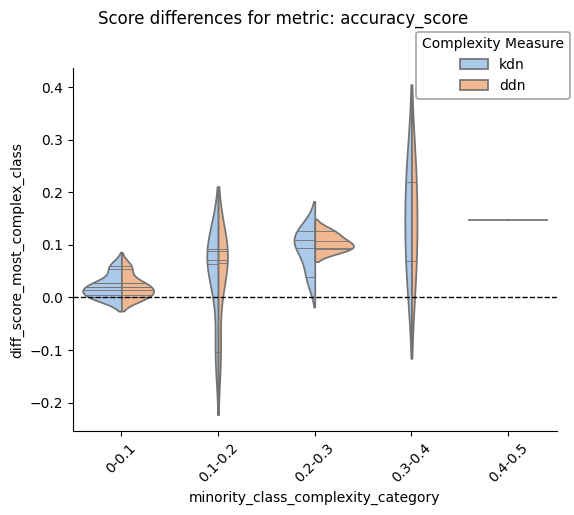

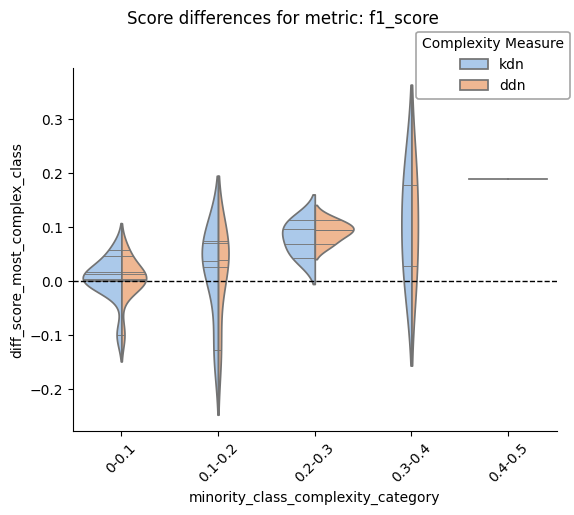

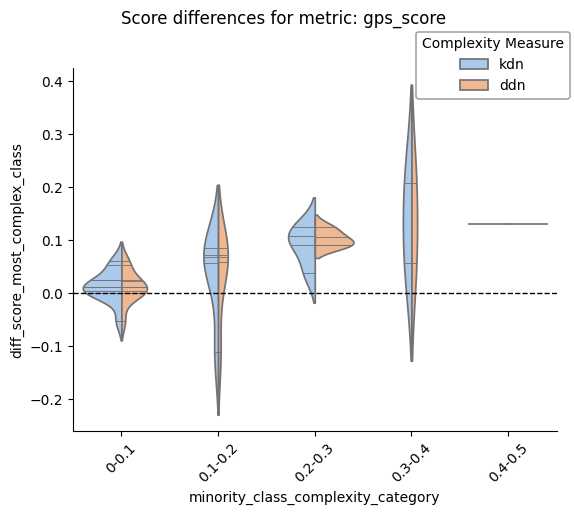

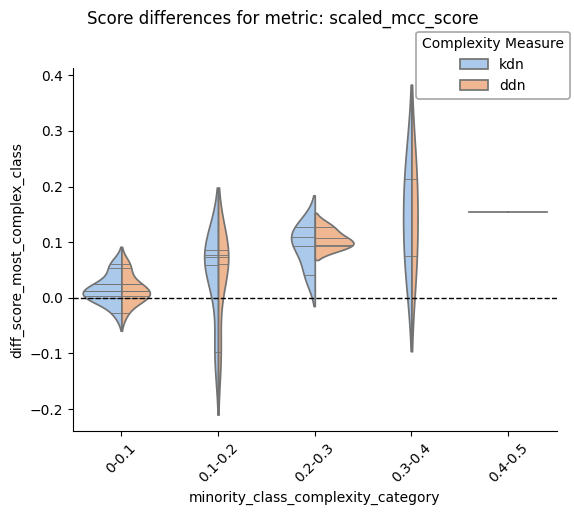

In [11]:
plot_score_differences(df_merged_balanced, diff='diff_score_most_complex_class', x_var='minority_class_complexity_category')

In [12]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged_balanced[df_merged_balanced['metric_x'] == performance_metric], diff='diff_score_minority_class_complexity', x_var='most_complex_class_category'))

accuracy_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.019269,0.020194,0.021249,0.000000,0.059916,11
1,0-0.1,kdn,0.019269,0.020265,0.021326,0.000000,0.060244,11
2,0.1-0.2,ddn,0.071602,0.042319,0.082301,-0.103577,0.091333,5
3,0.1-0.2,kdn,0.071602,0.042227,0.082270,-0.103577,0.091333,5
4,0.2-0.3,ddn,0.101353,0.104974,0.015538,0.091618,0.125571,4
5,0.2-0.3,kdn,0.102167,0.092223,0.037697,0.038988,0.125571,4
6,0.3-0.4,ddn,0.144389,0.144389,0.106172,0.069314,0.219464,2
7,0.3-0.4,kdn,0.144389,0.144389,0.106172,0.069314,0.219464,2
8,0.4-0.5,ddn,0.146557,0.146557,NaN,0.146557,0.146557,1
9,0.4-0.5,kdn,0.146557,0.146557,NaN,0.146557,0.146557,1


f1_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.000000,0.003536,0.039705,-0.099023,0.058444,11
1,0-0.1,kdn,0.000000,0.003607,0.039761,-0.099023,0.058771,11
2,0.1-0.2,ddn,0.038705,0.016779,0.082988,-0.126820,0.075449,5
3,0.1-0.2,kdn,0.038247,0.016688,0.082958,-0.126820,0.075449,5
4,0.2-0.3,ddn,0.094876,0.093116,0.018375,0.068991,0.113723,4
5,0.2-0.3,kdn,0.082647,0.080366,0.031272,0.042448,0.113723,4
6,0.3-0.4,ddn,0.104152,0.104152,0.106265,0.029012,0.179293,2
7,0.3-0.4,kdn,0.104152,0.104152,0.106265,0.029012,0.179293,2
8,0.4-0.5,ddn,0.190319,0.190319,NaN,0.190319,0.190319,1
9,0.4-0.5,kdn,0.190319,0.190319,NaN,0.190319,0.190319,1


gps_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.011081,0.011974,0.029864,-0.052085,0.059821,11
1,0-0.1,kdn,0.011081,0.012045,0.029935,-0.052085,0.060148,11
2,0.1-0.2,ddn,0.067687,0.034399,0.081807,-0.110851,0.085696,5
3,0.1-0.2,kdn,0.067687,0.034308,0.081774,-0.110851,0.085696,5
4,0.2-0.3,ddn,0.098869,0.103097,0.015880,0.090534,0.124114,4
5,0.2-0.3,kdn,0.099409,0.090346,0.037216,0.038453,0.124114,4
6,0.3-0.4,ddn,0.132846,0.132846,0.106329,0.057659,0.208032,2
7,0.3-0.4,kdn,0.132846,0.132846,0.106329,0.057659,0.208032,2
8,0.4-0.5,ddn,0.130090,0.130090,NaN,0.130090,0.130090,1
9,0.4-0.5,kdn,0.130090,0.130090,NaN,0.130090,0.130090,1


scaled_mcc_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.012127,0.014488,0.025357,-0.027966,0.060149,11
1,0-0.1,kdn,0.012127,0.014560,0.025435,-0.027966,0.060476,11
2,0.1-0.2,ddn,0.072856,0.039510,0.077436,-0.098006,0.085972,5
3,0.1-0.2,kdn,0.072856,0.039419,0.077406,-0.098006,0.085972,5
4,0.2-0.3,ddn,0.100998,0.105700,0.016319,0.092869,0.127935,4
5,0.2-0.3,kdn,0.101206,0.092950,0.037199,0.041452,0.127935,4
6,0.3-0.4,ddn,0.143648,0.143648,0.097822,0.074477,0.212818,2
7,0.3-0.4,kdn,0.143648,0.143648,0.097822,0.074477,0.212818,2
8,0.4-0.5,ddn,0.154301,0.154301,NaN,0.154301,0.154301,1
9,0.4-0.5,kdn,0.154301,0.154301,NaN,0.154301,0.154301,1


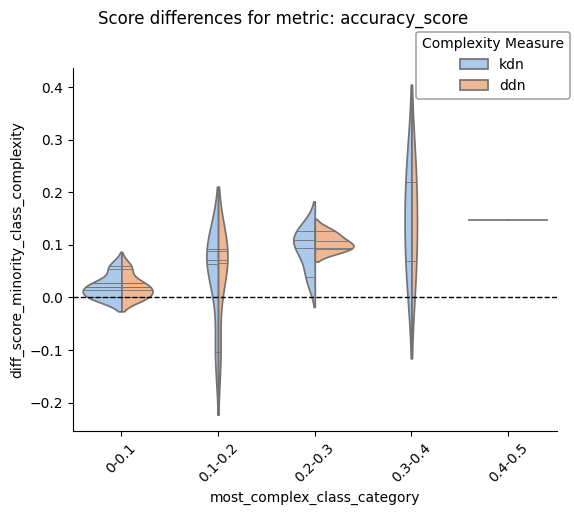

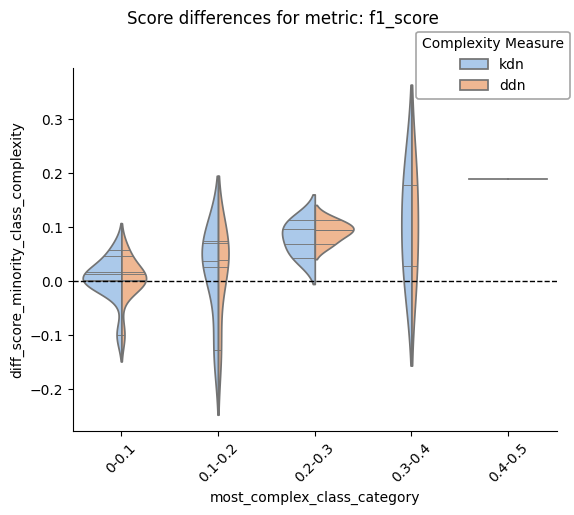

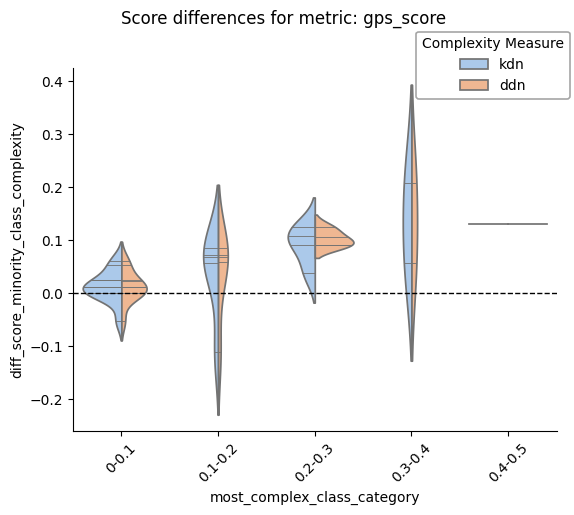

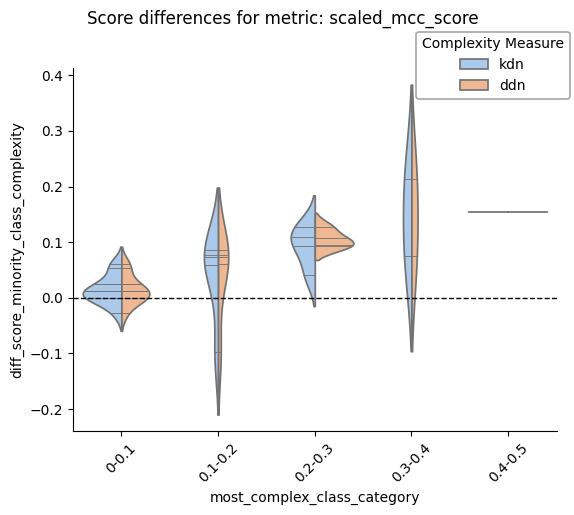

In [13]:
plot_score_differences(df_merged_balanced, diff='diff_score_minority_class_complexity', x_var='most_complex_class_category')

In [14]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged_balanced[df_merged_balanced['metric_x'] == performance_metric], diff='diff_score_minority_class_complexity', x_var='minority_class_complexity_category'))

accuracy_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.019269,0.020194,0.021249,0.000000,0.059916,11
1,0-0.1,kdn,0.019269,0.020265,0.021326,0.000000,0.060244,11
2,0.1-0.2,ddn,0.071602,0.042319,0.082301,-0.103577,0.091333,5
3,0.1-0.2,kdn,0.071602,0.042227,0.082270,-0.103577,0.091333,5
4,0.2-0.3,ddn,0.101353,0.104974,0.015538,0.091618,0.125571,4
5,0.2-0.3,kdn,0.102167,0.092223,0.037697,0.038988,0.125571,4
6,0.3-0.4,ddn,0.144389,0.144389,0.106172,0.069314,0.219464,2
7,0.3-0.4,kdn,0.144389,0.144389,0.106172,0.069314,0.219464,2
8,0.4-0.5,ddn,0.146557,0.146557,NaN,0.146557,0.146557,1
9,0.4-0.5,kdn,0.146557,0.146557,NaN,0.146557,0.146557,1


f1_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.000000,0.003536,0.039705,-0.099023,0.058444,11
1,0-0.1,kdn,0.000000,0.003607,0.039761,-0.099023,0.058771,11
2,0.1-0.2,ddn,0.038705,0.016779,0.082988,-0.126820,0.075449,5
3,0.1-0.2,kdn,0.038247,0.016688,0.082958,-0.126820,0.075449,5
4,0.2-0.3,ddn,0.094876,0.093116,0.018375,0.068991,0.113723,4
5,0.2-0.3,kdn,0.082647,0.080366,0.031272,0.042448,0.113723,4
6,0.3-0.4,ddn,0.104152,0.104152,0.106265,0.029012,0.179293,2
7,0.3-0.4,kdn,0.104152,0.104152,0.106265,0.029012,0.179293,2
8,0.4-0.5,ddn,0.190319,0.190319,NaN,0.190319,0.190319,1
9,0.4-0.5,kdn,0.190319,0.190319,NaN,0.190319,0.190319,1


gps_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.011081,0.011974,0.029864,-0.052085,0.059821,11
1,0-0.1,kdn,0.011081,0.012045,0.029935,-0.052085,0.060148,11
2,0.1-0.2,ddn,0.067687,0.034399,0.081807,-0.110851,0.085696,5
3,0.1-0.2,kdn,0.067687,0.034308,0.081774,-0.110851,0.085696,5
4,0.2-0.3,ddn,0.098869,0.103097,0.015880,0.090534,0.124114,4
5,0.2-0.3,kdn,0.099409,0.090346,0.037216,0.038453,0.124114,4
6,0.3-0.4,ddn,0.132846,0.132846,0.106329,0.057659,0.208032,2
7,0.3-0.4,kdn,0.132846,0.132846,0.106329,0.057659,0.208032,2
8,0.4-0.5,ddn,0.130090,0.130090,NaN,0.130090,0.130090,1
9,0.4-0.5,kdn,0.130090,0.130090,NaN,0.130090,0.130090,1


scaled_mcc_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.012127,0.014488,0.025357,-0.027966,0.060149,11
1,0-0.1,kdn,0.012127,0.014560,0.025435,-0.027966,0.060476,11
2,0.1-0.2,ddn,0.072856,0.039510,0.077436,-0.098006,0.085972,5
3,0.1-0.2,kdn,0.072856,0.039419,0.077406,-0.098006,0.085972,5
4,0.2-0.3,ddn,0.100998,0.105700,0.016319,0.092869,0.127935,4
5,0.2-0.3,kdn,0.101206,0.092950,0.037199,0.041452,0.127935,4
6,0.3-0.4,ddn,0.143648,0.143648,0.097822,0.074477,0.212818,2
7,0.3-0.4,kdn,0.143648,0.143648,0.097822,0.074477,0.212818,2
8,0.4-0.5,ddn,0.154301,0.154301,NaN,0.154301,0.154301,1
9,0.4-0.5,kdn,0.154301,0.154301,NaN,0.154301,0.154301,1


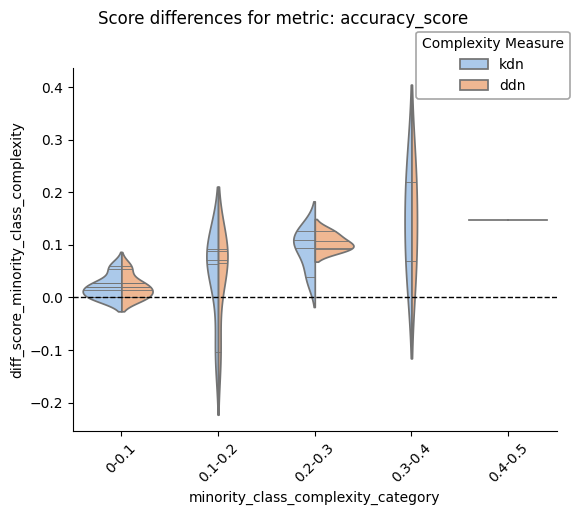

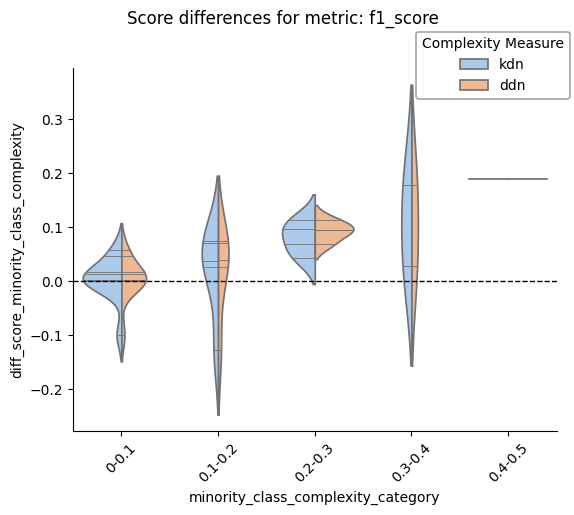

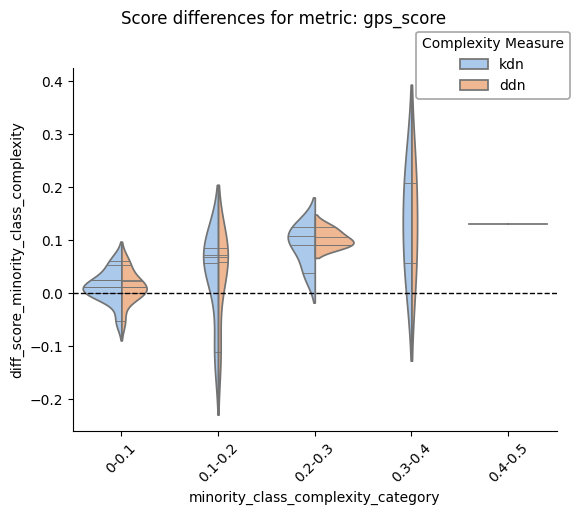

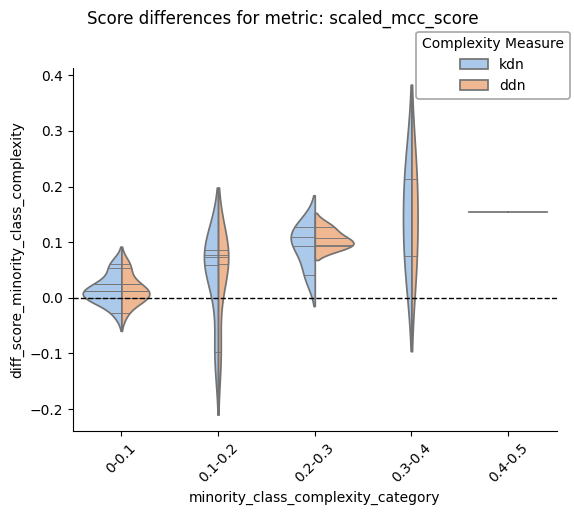

In [15]:
plot_score_differences(df_merged_balanced, diff='diff_score_minority_class_complexity', x_var='minority_class_complexity_category')

# Complexity category imbalanced

In [16]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged_imbalanced[df_merged_imbalanced['metric_x'] == performance_metric], diff='diff_score_most_complex_class', x_var='most_complex_class_category'))

accuracy_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.138752,0.144969,0.025672,0.122976,0.173178,3
3,0.1-0.2,kdn,0.138752,0.140520,0.031811,0.109631,0.173178,3
4,0.2-0.3,ddn,0.228571,0.212534,0.054115,0.102984,0.282651,11
5,0.2-0.3,kdn,0.198783,0.204013,0.047249,0.102984,0.282651,12
6,0.3-0.4,ddn,0.284057,0.294795,0.032773,0.260934,0.357719,7
7,0.3-0.4,kdn,0.279763,0.284611,0.033482,0.225753,0.337296,9
8,0.4-0.5,ddn,0.394300,0.411582,0.121749,0.249372,0.677778,21
9,0.4-0.5,kdn,0.393316,0.414964,0.128195,0.249372,0.677778,18


f1_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,-0.000733,0.005398,0.028914,-0.019960,0.036885,3
3,0.1-0.2,kdn,-0.000733,0.000949,0.035126,-0.033305,0.036885,3
4,0.2-0.3,ddn,0.046176,-0.062183,0.200499,-0.388638,0.145113,11
5,0.2-0.3,kdn,-0.106389,-0.140645,0.223514,-0.430686,0.115381,12
6,0.3-0.4,ddn,0.052381,-0.039619,0.229522,-0.353460,0.259240,7
7,0.3-0.4,kdn,0.052381,0.015373,0.176796,-0.249528,0.259240,9
8,0.4-0.5,ddn,0.088771,0.101874,0.129629,-0.130524,0.436151,21
9,0.4-0.5,kdn,0.131982,0.120097,0.146569,-0.145937,0.437118,18


gps_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.076803,0.073319,0.019787,0.052021,0.091133,3
3,0.1-0.2,kdn,0.076803,0.068871,0.027113,0.038676,0.091133,3
4,0.2-0.3,ddn,0.087139,0.026302,0.156919,-0.236663,0.186869,11
5,0.2-0.3,kdn,-0.014793,-0.036726,0.177521,-0.278711,0.165214,12
6,0.3-0.4,ddn,0.154490,0.069321,0.178545,-0.198159,0.274523,7
7,0.3-0.4,kdn,0.154490,0.117239,0.124021,-0.083092,0.274523,9
8,0.4-0.5,ddn,0.214279,0.212498,0.102569,0.021812,0.436961,21
9,0.4-0.5,kdn,0.224854,0.225386,0.126018,-0.047233,0.441260,18


scaled_mcc_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.101135,0.089362,0.024213,0.061514,0.105438,3
3,0.1-0.2,kdn,0.101135,0.084914,0.031895,0.048169,0.105438,3
4,0.2-0.3,ddn,0.099119,0.097201,0.088531,-0.038468,0.220681,11
5,0.2-0.3,kdn,0.049702,0.052281,0.101943,-0.080516,0.184334,12
6,0.3-0.4,ddn,0.186649,0.144287,0.108172,-0.020117,0.276418,7
7,0.3-0.4,kdn,0.186649,0.170139,0.079370,0.041309,0.276418,9
8,0.4-0.5,ddn,0.310686,0.293434,0.085993,0.142880,0.452507,21
9,0.4-0.5,kdn,0.309610,0.306504,0.093070,0.164022,0.475189,18


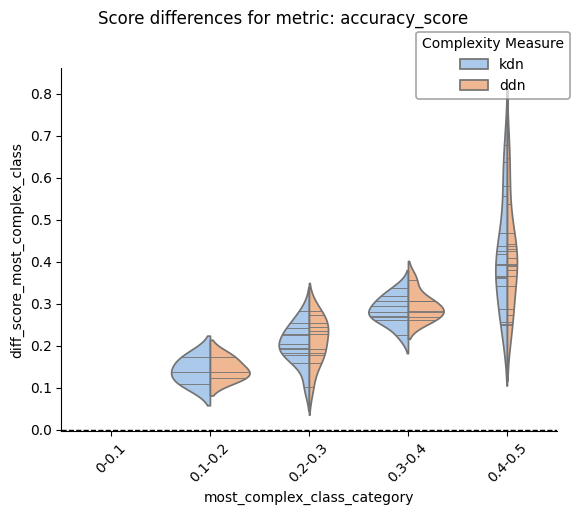

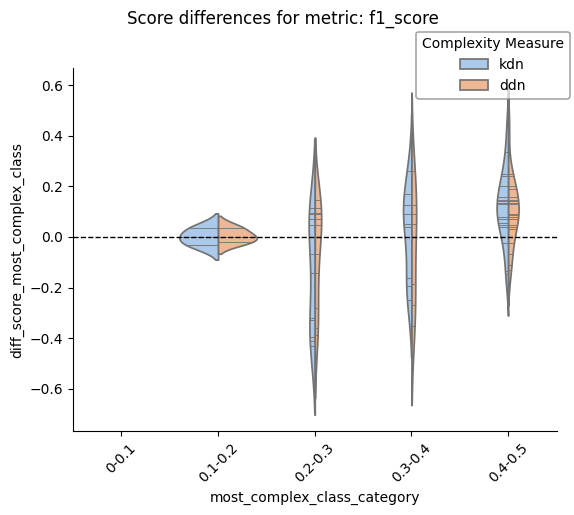

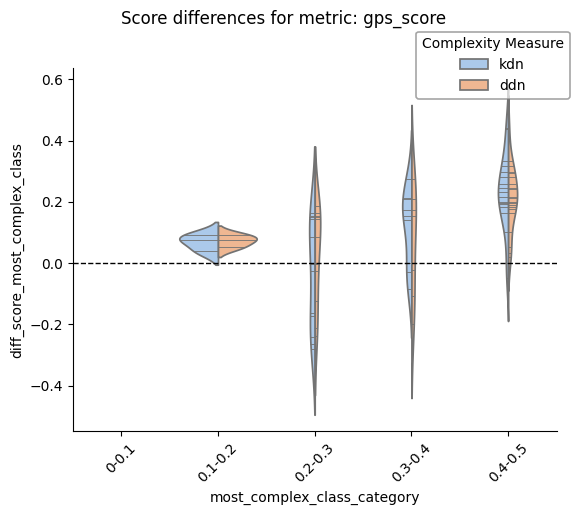

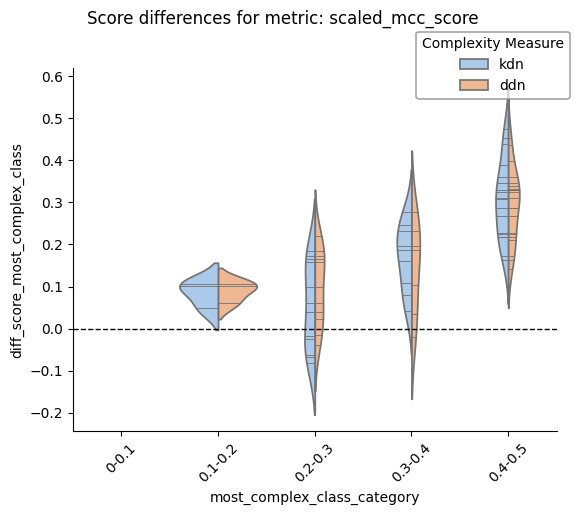

In [17]:
plot_score_differences(df_merged_imbalanced, diff='diff_score_most_complex_class', x_var='most_complex_class_category')

In [18]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged_imbalanced[df_merged_imbalanced['metric_x'] == performance_metric], diff='diff_score_most_complex_class', x_var='minority_class_complexity_category'))

accuracy_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.155965,0.217973,0.147506,0.122976,0.436986,4
3,0.1-0.2,kdn,0.155965,0.214879,0.150968,0.109631,0.437954,4
4,0.2-0.3,ddn,0.228571,0.212534,0.054115,0.102984,0.282651,11
5,0.2-0.3,kdn,0.198783,0.204013,0.047249,0.102984,0.282651,12
6,0.3-0.4,ddn,0.284057,0.294795,0.032773,0.260934,0.357719,7
7,0.3-0.4,kdn,0.279763,0.284611,0.033482,0.225753,0.337296,9
8,0.4-0.5,ddn,0.393316,0.410311,0.124769,0.249372,0.677778,20
9,0.4-0.5,kdn,0.392333,0.413612,0.132008,0.249372,0.677778,17


f1_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.018076,0.113086,0.216667,-0.019960,0.436151,4
3,0.1-0.2,kdn,0.018076,0.109991,0.219962,-0.033305,0.437118,4
4,0.2-0.3,ddn,0.046176,-0.062183,0.200499,-0.388638,0.145113,11
5,0.2-0.3,kdn,-0.106389,-0.140645,0.223514,-0.430686,0.115381,12
6,0.3-0.4,ddn,0.052381,-0.039619,0.229522,-0.353460,0.259240,7
7,0.3-0.4,kdn,0.052381,0.015373,0.176796,-0.249528,0.259240,9
8,0.4-0.5,ddn,0.088710,0.085160,0.107298,-0.130524,0.250549,20
9,0.4-0.5,kdn,0.128774,0.101449,0.127178,-0.145937,0.337065,17


gps_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.083968,0.164230,0.182537,0.052021,0.436961,4
3,0.1-0.2,kdn,0.083968,0.161135,0.185852,0.038676,0.437928,4
4,0.2-0.3,ddn,0.087139,0.026302,0.156919,-0.236663,0.186869,11
5,0.2-0.3,kdn,-0.014793,-0.036726,0.177521,-0.278711,0.165214,12
6,0.3-0.4,ddn,0.154490,0.069321,0.178545,-0.198159,0.274523,7
7,0.3-0.4,kdn,0.154490,0.117239,0.124021,-0.083092,0.274523,9
8,0.4-0.5,ddn,0.207866,0.201275,0.091049,0.021812,0.333158,20
9,0.4-0.5,kdn,0.215764,0.212883,0.117828,-0.047233,0.441260,17


scaled_mcc_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.103286,0.176311,0.175017,0.061514,0.437155,4
3,0.1-0.2,kdn,0.103286,0.173216,0.178514,0.048169,0.438123,4
4,0.2-0.3,ddn,0.099119,0.097201,0.088531,-0.038468,0.220681,11
5,0.2-0.3,kdn,0.049702,0.052281,0.101943,-0.080516,0.184334,12
6,0.3-0.4,ddn,0.186649,0.144287,0.108172,-0.020117,0.276418,7
7,0.3-0.4,kdn,0.186649,0.170139,0.079370,0.041309,0.276418,9
8,0.4-0.5,ddn,0.299048,0.286248,0.081502,0.142880,0.452507,20
9,0.4-0.5,kdn,0.308535,0.298761,0.089761,0.164022,0.475189,17


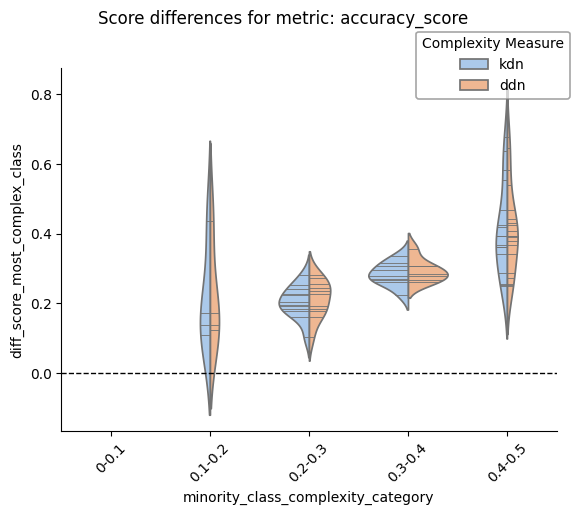

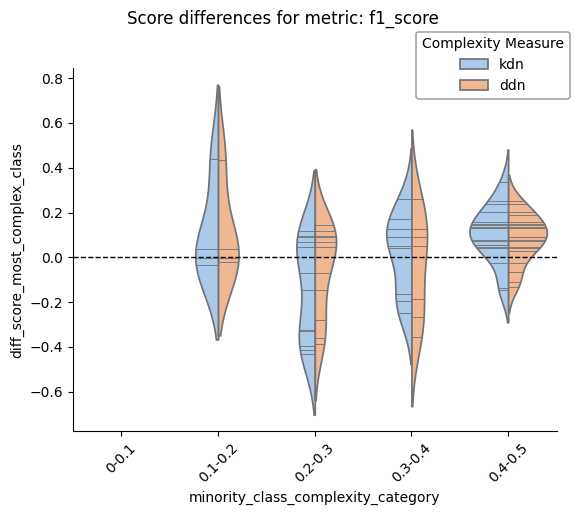

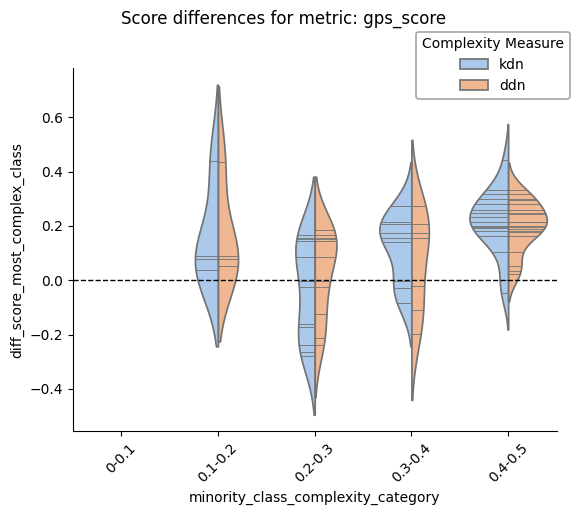

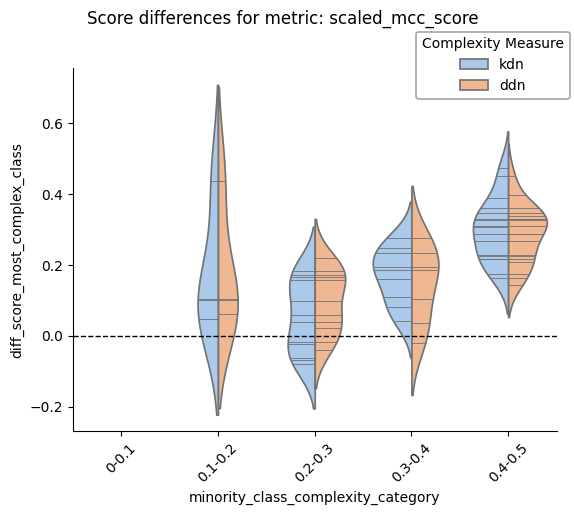

In [19]:
plot_score_differences(df_merged_imbalanced, diff='diff_score_most_complex_class', x_var='minority_class_complexity_category')

In [20]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged_imbalanced[df_merged_imbalanced['metric_x'] == performance_metric], diff='diff_score_minority_class_complexity', x_var='most_complex_class_category'))

accuracy_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.138752,0.144969,0.025672,0.122976,0.173178,3
3,0.1-0.2,kdn,0.138752,0.140520,0.031811,0.109631,0.173178,3
4,0.2-0.3,ddn,0.228571,0.212534,0.054115,0.102984,0.282651,11
5,0.2-0.3,kdn,0.198783,0.204013,0.047249,0.102984,0.282651,12
6,0.3-0.4,ddn,0.284057,0.294795,0.032773,0.260934,0.357719,7
7,0.3-0.4,kdn,0.279763,0.284611,0.033482,0.225753,0.337296,9
8,0.4-0.5,ddn,0.392333,0.395118,0.140130,0.091259,0.677778,21
9,0.4-0.5,kdn,0.379351,0.395646,0.149034,0.090224,0.677778,18


f1_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,-0.000733,0.005398,0.028914,-0.019960,0.036885,3
3,0.1-0.2,kdn,-0.000733,0.000949,0.035126,-0.033305,0.036885,3
4,0.2-0.3,ddn,0.046176,-0.062183,0.200499,-0.388638,0.145113,11
5,0.2-0.3,kdn,-0.106389,-0.140645,0.223514,-0.430686,0.115381,12
6,0.3-0.4,ddn,0.052381,-0.039619,0.229522,-0.353460,0.259240,7
7,0.3-0.4,kdn,0.052381,0.015373,0.176796,-0.249528,0.259240,9
8,0.4-0.5,ddn,0.088771,0.085411,0.104588,-0.130524,0.250549,21
9,0.4-0.5,kdn,0.109081,0.100779,0.123413,-0.145937,0.337065,18


gps_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.076803,0.073319,0.019787,0.052021,0.091133,3
3,0.1-0.2,kdn,0.076803,0.068871,0.027113,0.038676,0.091133,3
4,0.2-0.3,ddn,0.087139,0.026302,0.156919,-0.236663,0.186869,11
5,0.2-0.3,kdn,-0.014793,-0.036726,0.177521,-0.278711,0.165214,12
6,0.3-0.4,ddn,0.154490,0.069321,0.178545,-0.198159,0.274523,7
7,0.3-0.4,kdn,0.154490,0.117239,0.124021,-0.083092,0.274523,9
8,0.4-0.5,ddn,0.201453,0.196034,0.091935,0.021812,0.333158,21
9,0.4-0.5,kdn,0.208609,0.206067,0.117911,-0.047233,0.441260,18


scaled_mcc_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.101135,0.089362,0.024213,0.061514,0.105438,3
3,0.1-0.2,kdn,0.101135,0.084914,0.031895,0.048169,0.105438,3
4,0.2-0.3,ddn,0.099119,0.097201,0.088531,-0.038468,0.220681,11
5,0.2-0.3,kdn,0.049702,0.052281,0.101943,-0.080516,0.184334,12
6,0.3-0.4,ddn,0.186649,0.144287,0.108172,-0.020117,0.276418,7
7,0.3-0.4,kdn,0.186649,0.170139,0.079370,0.041309,0.276418,9
8,0.4-0.5,ddn,0.287411,0.276971,0.090099,0.091428,0.452507,21
9,0.4-0.5,kdn,0.297947,0.287185,0.099976,0.090393,0.475189,18


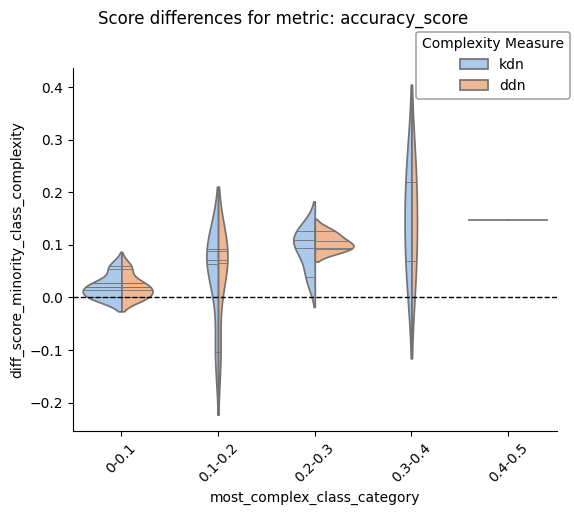

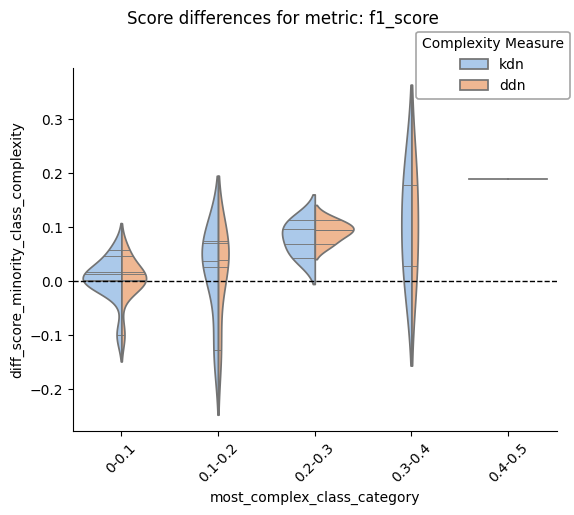

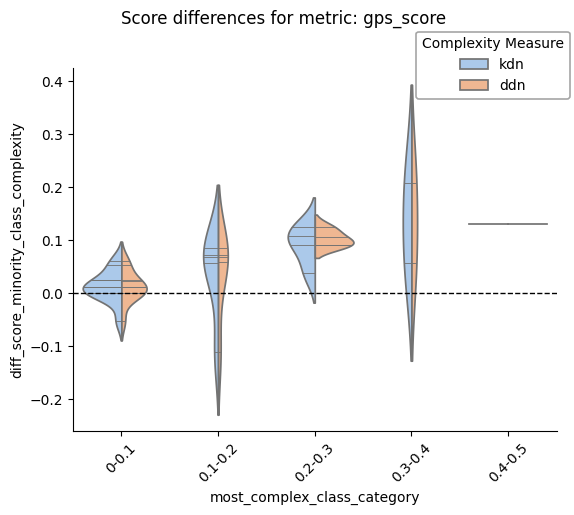

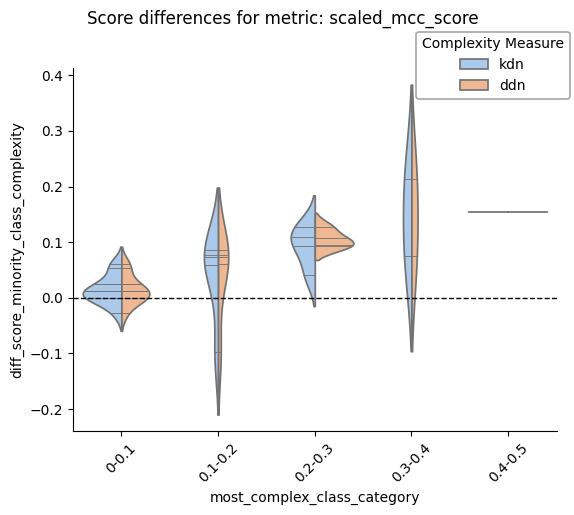

In [21]:
plot_score_differences(df_merged_balanced, diff='diff_score_minority_class_complexity', x_var='most_complex_class_category')

In [22]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged_imbalanced[df_merged_imbalanced['metric_x'] == performance_metric], diff='diff_score_minority_class_complexity', x_var='minority_class_complexity_category'))

accuracy_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.130864,0.131541,0.034067,0.091259,0.173178,4
3,0.1-0.2,kdn,0.124191,0.127946,0.036153,0.090224,0.173178,4
4,0.2-0.3,ddn,0.228571,0.212534,0.054115,0.102984,0.282651,11
5,0.2-0.3,kdn,0.198783,0.204013,0.047249,0.102984,0.282651,12
6,0.3-0.4,ddn,0.284057,0.294795,0.032773,0.260934,0.357719,7
7,0.3-0.4,kdn,0.279763,0.284611,0.033482,0.225753,0.337296,9
8,0.4-0.5,ddn,0.393316,0.410311,0.124769,0.249372,0.677778,20
9,0.4-0.5,kdn,0.392333,0.413612,0.132008,0.249372,0.677778,17


f1_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.018076,0.026654,0.048628,-0.019960,0.090423,4
3,0.1-0.2,kdn,0.018076,0.023059,0.052706,-0.033305,0.089388,4
4,0.2-0.3,ddn,0.046176,-0.062183,0.200499,-0.388638,0.145113,11
5,0.2-0.3,kdn,-0.106389,-0.140645,0.223514,-0.430686,0.115381,12
6,0.3-0.4,ddn,0.052381,-0.039619,0.229522,-0.353460,0.259240,7
7,0.3-0.4,kdn,0.052381,0.015373,0.176796,-0.249528,0.259240,9
8,0.4-0.5,ddn,0.088710,0.085160,0.107298,-0.130524,0.250549,20
9,0.4-0.5,kdn,0.128774,0.101449,0.127178,-0.145937,0.337065,17


gps_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.083968,0.077798,0.018473,0.052021,0.091233,4
3,0.1-0.2,kdn,0.083501,0.074203,0.024572,0.038676,0.091133,4
4,0.2-0.3,ddn,0.087139,0.026302,0.156919,-0.236663,0.186869,11
5,0.2-0.3,kdn,-0.014793,-0.036726,0.177521,-0.278711,0.165214,12
6,0.3-0.4,ddn,0.154490,0.069321,0.178545,-0.198159,0.274523,7
7,0.3-0.4,kdn,0.154490,0.117239,0.124021,-0.083092,0.274523,9
8,0.4-0.5,ddn,0.207866,0.201275,0.091049,0.021812,0.333158,20
9,0.4-0.5,kdn,0.215764,0.212883,0.117828,-0.047233,0.441260,17


scaled_mcc_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,NaN,NaN,NaN,NaN,NaN,0
1,0-0.1,kdn,NaN,NaN,NaN,NaN,NaN,0
2,0.1-0.2,ddn,0.096281,0.089879,0.019797,0.061514,0.105438,4
3,0.1-0.2,kdn,0.095764,0.086284,0.026186,0.048169,0.105438,4
4,0.2-0.3,ddn,0.099119,0.097201,0.088531,-0.038468,0.220681,11
5,0.2-0.3,kdn,0.049702,0.052281,0.101943,-0.080516,0.184334,12
6,0.3-0.4,ddn,0.186649,0.144287,0.108172,-0.020117,0.276418,7
7,0.3-0.4,kdn,0.186649,0.170139,0.079370,0.041309,0.276418,9
8,0.4-0.5,ddn,0.299048,0.286248,0.081502,0.142880,0.452507,20
9,0.4-0.5,kdn,0.308535,0.298761,0.089761,0.164022,0.475189,17


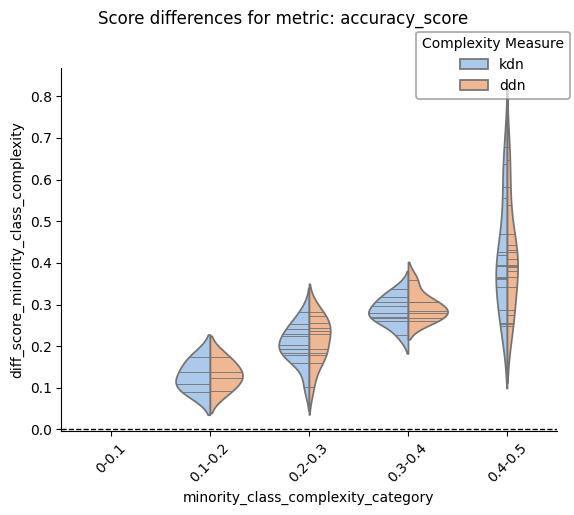

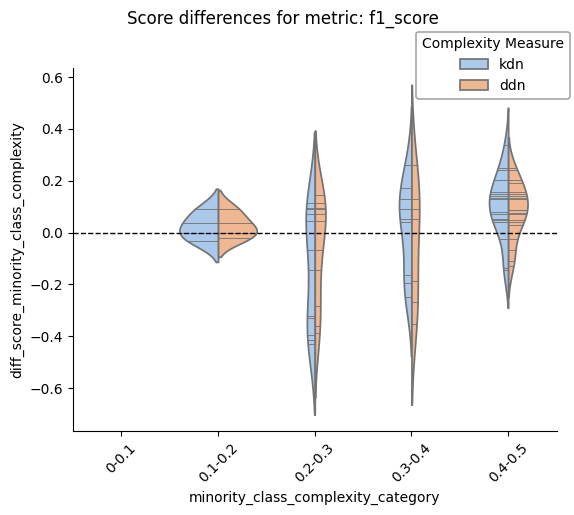

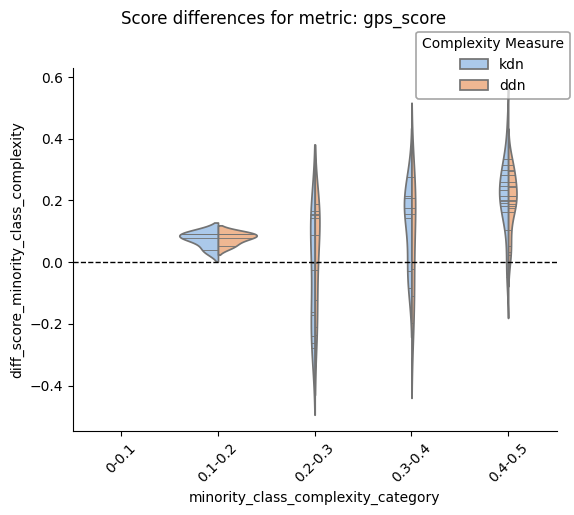

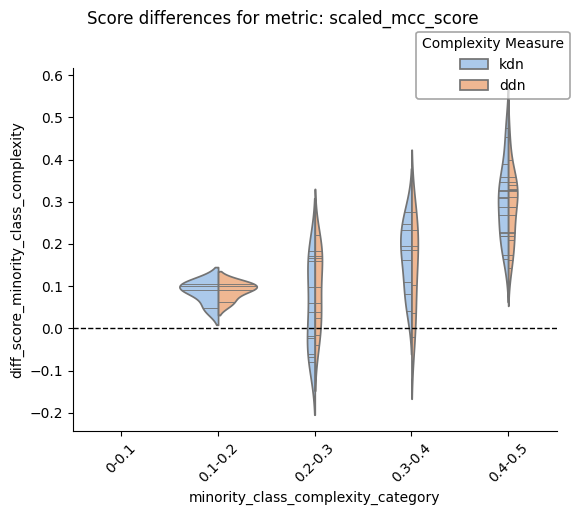

In [23]:
plot_score_differences(df_merged_imbalanced, diff='diff_score_minority_class_complexity', x_var='minority_class_complexity_category')